In [3]:
import pandas as pd 
import numpy as np

In [33]:
df = pd.read_csv("heart.csv")
#from further analysis we noticed that there was a duplicated line in the dataset, so we remove the duplicates.
df = df.drop_duplicates()
#df = df.drop("target",1)
#df = df.drop("exang",1)
#we notice that, deleting the target variables the thing changes. 

In [34]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,2.3,0,0,1
1,37,1,2,130,250,0,1,187,3.5,0,0,2
2,41,0,1,130,204,0,0,172,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0.8,2,0,2
4,57,0,0,120,354,0,1,163,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0.4,1,0,1
6,56,0,1,140,294,0,0,153,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0.5,2,0,3
9,57,1,2,150,168,0,1,174,1.6,2,0,2


In [35]:
#Here we normalize the data.

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

In [36]:
normalized_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,0.096774,1.0,0.0,0.666667
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.064516,0.5,0.0,0.333333
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.209677,0.5,0.0,0.666667
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.000000,1.0,0.0,1.000000
8,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.5,0.694656,0.080645,1.0,0.0,1.000000
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.258065,1.0,0.0,0.666667


In [37]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

cosine_matrix = cosine_similarity(normalized_df) 
cosine_matrix = cosine_matrix- np.eye(cosine_matrix.shape[0])
cosine_matrix[107,119]

0.9994254457874469

In [38]:
np.where(cosine_matrix==cosine_matrix.max())

(array([107, 119]), array([119, 107]))

In [39]:
euclidean_matrix = euclidean_distances(normalized_df)
euclidean_matrix = euclidean_matrix+ np.eye(euclidean_matrix.shape[0])

In [40]:
np.where(euclidean_matrix==euclidean_matrix.min())

(array([107, 119]), array([119, 107]))

In [41]:
euclidean_matrix[107,119]

0.04159358559710246

In [42]:
#Here we visualize the attribute from the two most similar elements in the dataset according to the two distances
df.loc[[107]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,0.2,1,0,2


In [43]:
df.loc[[119]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
119,46,0,0,138,243,0,0,152,0.0,1,0,2


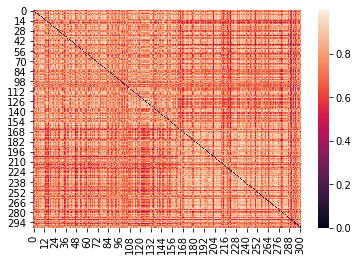

In [44]:
import seaborn as sbs 
sbs.heatmap(cosine_matrix)